In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
%matplotlib inline

# Integral doble trapezoide

$$\int_{a}^{b} dx \int_{r(x)}^{s(x)} dy f(x,y)$$


# Ejercicio 

$$\int_{0}^{\frac{\pi}{4}} dx \int_{\sin(x)}^{\cos(x)} dy \left[2y\sin(x)+\cos^2(x) \right]$$

La integral más interna toma la forma en función de la variable $x$:

$$F(x)=\int_{\sin(x)}^{\cos(x)} dy \left[2y\sin(x)+\cos^2(x) \right]$$

Y podemos calcular la integral final como:

$$\int_{0}^{\frac{\pi}{4}} dx F(x)$$

# El resultado final es:

$$\frac{1}{6}(5\sqrt{2}-4)$$

$$\frac{1}{\sqrt{18}}(\sqrt{25}-\sqrt{8})$$

In [2]:
def f(x,y):
    return 2*y*np.sin(x)+np.cos(x)**2

def r(x):
    return np.sin(x)

def s(x):
    return np.cos(x)

In [3]:
def Trapezoid(f,a,b,Ns):
    if Ns==0:
        return 0
    
    else:

        #Ns: Numero de intervalos
        x=np.linspace(a,b,Ns+1)

    
        h=x[1]-x[0]
        suma=h/2*(f(x[0])+f(x[Ns]))
    
        for j in range(1,Ns-1 +1):
            suma+=h*f(x[j])

        return suma

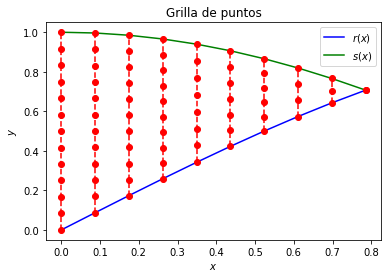

In [4]:
a=0
b=np.pi/4
Nx=10

x=np.linspace(a,b,Nx)
hx=x[1]-x[0]

plt.plot(x,r(x),color='blue',label='$r(x)$')
plt.plot(x,s(x),color='green',label='$s(x)$')

for i in range(Nx):
    y=np.arange(r(x[i]),s(x[i])+hx,hx)
    Ny=len(y)
    y=np.linspace(r(x[i]),s(x[i]),Ny)
    xi=[x[i]]*Ny
    plt.plot(xi,y,'o--',color='red')

plt.title('Grilla de puntos')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()

In [5]:
def f(x,y):
    return 2*y*np.sin(x)+np.cos(x)**2

def r(x):
    return np.sin(x)

def s(x):
    return np.cos(x)

a=0
b=np.pi/4
Nx=5

x=np.linspace(a,b,Nx)
hx=x[1]-x[0]

In [6]:
def F(x):
    
    def g(y):
        return f(x,y)
    
    y=np.arange(r(x),s(x)+hx,hx)
    Ny=len(y)

    return Trapezoid(g,r(x),s(x),Ny-1)

Integral calculada con 10 puntos: 0.5107533090147643


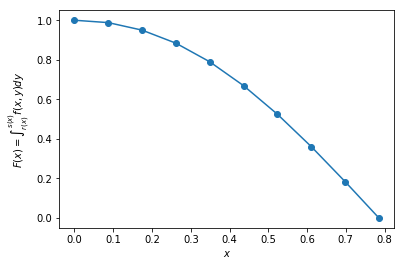

In [7]:
a=0
b=np.pi/4
Nx=10

x=np.linspace(a,b,Nx)
hx=x[1]-x[0]

Fs=np.zeros(len(x))

for i in range(len(x)):
    Fs[i]=F(x[i])

plt.plot(x,Fs,'o-')
plt.xlabel('$x$') 
plt.ylabel('$F(x)=\int_{r(x)}^{s(x)}f(x,y)dy$')

print('Integral calculada con',Nx,'puntos:',Trapezoid(F,a,b,Nx))

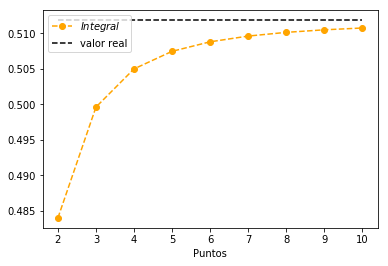

In [8]:
Nmax=Nx

N=np.arange(2,Nmax+1,1)
I=np.zeros(len(N))

for i in range(len(N)):
    I[i]=Trapezoid(F,a,b,N[i])
    
plt.plot(N,I,'o--',color='orange',label='$Integral$')
plt.hlines(0.511845,2,Nmax,label='valor real',linestyle='dashed')
plt.xlabel('Puntos')
plt.legend()

In [9]:
#Debug
#Como corregir cuando s(x)<r(x)
F(1)

IndexError: index 1 is out of bounds for axis 0 with size 0